We explore Cherenkov Radiation for this project. Cherenkov Radiation results from a charged particle that moves with a speed greater than the speed of light **through that particular medium**. i.e.

$v_{par} > \frac{c}{n}$

In astrophysics, this is why the precise direction of the radiation gives us energy measurements! The radiation is a rapid energy-loss mechanism of the charged particle.

We will simulate spectra for Cherenkov radiation under different parameters.

We will assume the Frank-Tamm formula for the frequency spectrum resulting from a charged particle moving relativistically along the $x$ axis in a medium with refraction index $n$. For material on the derivation of this formula see Jackson (EM book) and many online resources. 

Frequency spectrum:

$\frac{dE}{dx} = \frac{q^2 \mu}{4\pi}(1-\frac{1}{\beta^2n^2}) \nu d\nu$

Let's get this in the form of $\nu F_{\nu}$ form. 

We have $\frac{dE}{dx}$ but we want $\nu F_{\nu}$. We note that $dx = \frac{c}{n} dt$ therefore

$\frac{dE}{dx} = \frac{n}{c} \frac{dE}{dt}$

Which is power. $P = \frac{dE}{dt}$

Next we note $P = \frac{4\pi L_\nu}{V}$ where $L_\nu$ is the luminosity at a given $\nu$ and $V$ is the volume. We also note that $L_\nu = F_\nu A$ where $A$ is the area.

Therefore,

$P = \frac{dE}{dt} = \frac{ 4\pi F_\nu A}{V}$

$V=AL$

$P = \frac{dE}{dt} = \frac{ 4\pi F_\nu}{L}$

Where $L$ is the distance travelled by the moving charged particle. This would be an input parameter.

Moving things around, we see that $F_\nu$ becomes

$F_\nu = \frac{c L}{4\pi n} \bigg[\frac{q^2 \mu}{4\pi}(1-\frac{1}{\beta^2n^2}) \nu d\nu \bigg]$

To get the form we are looking for, we multiply a fancy one to the right hand side, i.e. $\frac{\nu}{\nu}$:
    
$F_\nu = \frac{q^2 c \mu \ln(10)}{(4\pi )^2 n} (1-\frac{1}{\beta^2n^2}) L \nu^2 d(\log(\nu))$

And finally, multiply by one more $\nu$:
    
$\nu F_\nu = A(n) (1-\frac{1}{\beta^2n^2}) L \nu^3 d(\log(\nu))$

with $A(n) = \frac{q^2 c \mu \ln(10)}{(4\pi)^2 n}$. A is a function of n because $\mu$ is the magnetic permeability and depends on the material of which we propagate through. But since we are interested in only interactions in water, we will simplify quite a bit in a moment.

So we see $A(n)$ is just a constant in our simple model because $n=1.333$ in water, therefore $\mu$ is a determined, unchanging quantity ($\mu = 1.25\times10^{-6} H/m$) and the rest are fundamental constants. So we note that $A(n=1.33) = A = 1.05248\times10^{-37} \frac{C^2H}{m}$

Now our equation looks like:
    
$\nu F_\nu = A (1-\frac{1}{\beta^2 n^2}) L \nu^3 d(\log(\nu))$

where $A$ is known, $\beta$ and $L$ are input parameters, and we plot against some frequency range $[\nu, \nu+d\nu]$

Now let's plot for varying $\beta$s and $L$s and $n$s. 

Import necessary packages.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.integrate as integrate
from scipy.integrate import quad

Define your variables.

In [2]:
# remember beta must be < 1 for Cherenkov radiation to occur but greater than 1/n which is 0.7518.
beta = 0.77777 #must be greater than 0.7518
L = 1e-3 #in meters because of the \mu constant's dimensions.
q = 1.6e-19 #fundamental charge.
n = 1.333
c = 3e8 # m/s
mu = 1.25e-6 #mu which is pretty much constant in most material.
A = q**2*c*mu*np.log(10)/(n*(4*np.pi)**2) #in C^2*H/m.
print A

1.0501154406272732e-37


In [3]:
#Our frequencies logarithmically spaced.
v = np.logspace(22, 26, num=10, base=10) #in Hz, from 100MeV and goes up to 2TeV.
# ln(10)log(x)=ln(x).... x = exp(ln(10)*log(x))
print v

[1.00000000e+22 2.78255940e+22 7.74263683e+22 2.15443469e+23
 5.99484250e+23 1.66810054e+24 4.64158883e+24 1.29154967e+25
 3.59381366e+25 1.00000000e+26]


Integrate with these values to find $\nu F_\nu$ $y$ points over varying frequency bins.

In [4]:
def integrand(v, beta): 
    return A*L*(1 - 1/(beta**(2)*(n)**2))*(v**(3))

#Integrate over the varying frequency bins for several data points (stored in v).
ans, err = quad(integrand, np.log10(2.41e22), np.log10(5.0e23), args=(beta,))
print ans
print err

1.17944858206e-37
1.30945097216e-51


Plot.

y=69005254452.072235x+(-309907319681162880167547089050402816.000000)


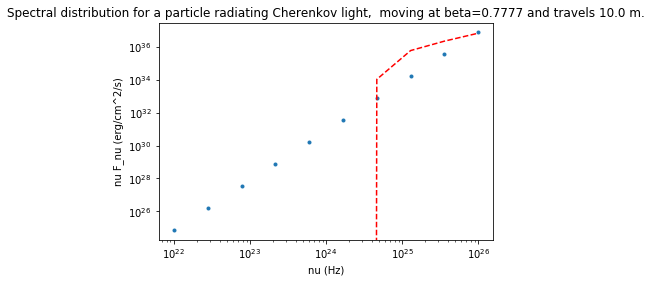

In [5]:
x = v
y = integrand(v,beta)
plt.scatter([x],[y], marker = ".", label = "Cherenkov light for beta=0.7777, L=100 m")
plt.xscale('log')
plt.yscale('log')
#plt.xlim([2e-1,1e4])
#plt.ylim([1e-15,5e-10])
plt.ylabel('nu F_nu (erg/cm^2/s)')
plt.xlabel('nu (Hz)')
plt.title('Spectral distribution for a particle radiating Cherenkov light,  moving at beta=0.7777 and travels 10.0 m.')
# plot the data itself
import pylab
#pylab.plot(x,y,'o')

# calc the trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
pylab.plot(x,p(x),"r--")
# the line equation:
print "y=%.6fx+(%.6f)"%(z[0],z[1])

What's happening lol? 

Now let's focus on making a movie of Cherenkov light from a moving charged particle.

Import packages:

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

Set up the figure and axes. Line, particle, and circle are the elements we want to animate.

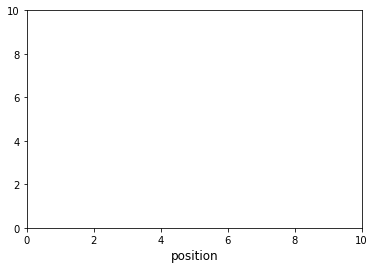

In [30]:
fig, ax = plt.subplots()
Nframes = 100
ax.set_xlim((0, 10))
ax.set_ylim((0, 10))


plt.xlabel('position', fontsize=12)
#plt.ylabel('x position', fontsize=12)
line, = ax.plot([], [], lw=1)
particle, = ax.plot([], [], marker='o', ms=7, color='blue')
circle, = ax.plot([], [], color='red')

Define intial function. 

In [31]:
def init():
    circle.set_data([], [])
    particle.set_data([], [])
    line.set_data([],[])
    return circle, particle, line,

Insert the motion of Cherenkov light. 

In [32]:
def animate(i):
    t = 3*np.pi*float(i/(Nframes-1.))
    t_total = np.linspace(0, 2.*np.pi, Nframes)
    t1 = 4
    t2 = 8
    t3 = 16
    t4 = 32
    x = 0.757*t
    y = 5
    c = 1
    circ1 = plt.Circle((0, 5), radius=c*(t-t1)*np.heaviside(t, t1), facecolor="None", edgecolor='k', lw=2)
    circ2 = plt.Circle((0, 5), radius=c*(t-t2)*np.heaviside(t, t2), facecolor="None", edgecolor='k', lw=2)
    circ3 = plt.Circle((0, 5), radius=c*(t-t3)*np.heaviside(t, t3), facecolor="None", edgecolor='k', lw=2)
    circ4 = plt.Circle((0, 5), radius=c*(t-t4)*np.heaviside(t, t4), facecolor="None", edgecolor='k', lw=2)
    ax.add_artist(circ1)
    ax.add_artist(circ2)
    ax.add_artist(circ3)
    ax.add_artist(circ4)
    #circle.set_data(x, y)
    line.set_data([0,10],[5])
    particle.set_data(x,y)
    return circle, particle, line,

In [33]:
#Compile
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=150, interval=20, 
                               blit=True)

In [34]:
#Display interactively
HTML(anim.to_html5_video())
#Or save to a file in your working directory
#anim.save('my_movie.mp4', fps=15)

So right now, really cool things are happening. But it's not cherenkov light. 

In [35]:
#With interactive interface
#HTML(anim.to_jshtml())